# **Dataset Balance** ༄˖°.🍂.ೃ࿔*:･

# SET UP

In [13]:
import torch

print("CUDA available? ", torch.cuda.is_available())        # True/False
print("Device count:   ", torch.cuda.device_count())        # misal: 1
if torch.cuda.is_available():
    print("Device name:   ", torch.cuda.get_device_name(0))


CUDA available?  True
Device count:    1
Device name:    NVIDIA A100-SXM4-40GB MIG 4g.20gb


In [2]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import shuffle
from collections import Counter

In [3]:
# Baca dataset
desa_wisata_df = pd.read_excel('0. Overall_fixx.xlsx', sheet_name='Pure + Aug')

In [4]:
desa_wisata_df

,review,cleaned_review,label,note,nama desa wisata
0,lebih baik lagi,lebih baik lagi,0,NaN,pentingsari
1,rute jln tiap hari,rute jalan tiap hari,0,NaN,pentingsari
2,"salah satu desa wisata di sleman, jogja","salah satu desa wisata di sleman , jogja",0,NaN,pentingsari
3,"desa wisata dengan view pepohonan hijau,","desa wisata dengan pemandangan pepohonan hijau ,",0,NaN,pentingsari
4,desa wisata ini sering digunakan buat wisata e...,desa wisata ini sering digunakan buat wisata e...,0,NaN,pentingsari
...,...,...,...,...,...
1995,airnya jernih bersih. . . saran kalau mau ke s...,airnya jernih bersih . saran kalau mau ke sini...,1,NaN,umbul ponggok
1996,tidak pernah kecewa berwisata ke umbul ponggok...,tidak pernah kecewa berwisata ke umbul ponggok...,1,NaN,umbul ponggok
1997,kolamnya jernih dan dingin,kolamnya jernih dan dingin,1,NaN,umbul ponggok
1998,oke tempatnya. . .,oke tempatnya .,1,NaN,umbul ponggok


In [ ]:
# Fungsi untuk menambahkan spasi setelah tanda baca
def add_space_after_punctuation(text):
    if isinstance(text, str):
        # Menambahkan spasi setelah tanda baca
        text = re.sub(r'([.,!?;:])', r'\1 ', text)
        # Menghapus spasi ganda yang mungkin terbentuk
        text = re.sub(r'\s+', ' ', text)
        return text.strip()
    return text

# Menerapkan fungsi ke kolom 'cleaned review'
desa_wisata_df['cleaned_review'] = desa_wisata_df['cleaned_review'].apply(add_space_after_punctuation)

# Mengacak urutan data
desa_wisata_df = shuffle(desa_wisata_df, random_state=42).reset_index(drop=True)

# Melihat 5 data pertama untuk memastikan perubahan
print("5 data pertama setelah preprocessing:")
print(desa_wisata_df.head())

5 data pertama setelah preprocessing:
                                              review  \
0  dengan suasana yang sejuk dan pemandangan yang...   
1                          wisata pantai hutan bakau   
2  bad service! ! ! petugas parkir yang bertugas ...   
3  gak jadi masuk karena : 1. panas bgt kalo sian...   
4  tempat dan rumah2 adat bagus tapi kurang teraw...   

                                      cleaned_review  label     note  \
0  dengan suasana yang sejuk dan pemandangan yang...      1      NaN   
1                             tur pantai hutan bakau      0  Inggris   
2  pelayanan yang buruk ! petugas parkir bus yang...      2   Jerman   
3  tidak jadi masuk karena : 1 . panas banget kal...      2    slang   
4  tempat - tempat dan rumah - rumah bagus , teta...      2   Swedia   

  nama desa wisata  
0       pujonkidul  
1   kampung blekok  
2      penglipuran  
3    umbul ponggok  
4        kete kesu  


In [ ]:
# Statistik dasar dataset
print("\nInformasi dataset:")
print(desa_wisata_df.info())


Informasi dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   review            2000 non-null   object
 1   cleaned_review    2000 non-null   object
 2   label             2000 non-null   int64 
 3   note              718 non-null    object
 4   nama desa wisata  2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB
None


In [ ]:
print("\nStatistik deskriptif:")
print(desa_wisata_df.describe(include='all'))


Statistik deskriptif:
                                                   review cleaned_review  \
count                                                2000           2000   
unique                                               1539           1995   
top     tempatnya pas untuk kemah anak-anak, tapi jala...     luar biasa   
freq                                                    5              2   
mean                                                  NaN            NaN   
std                                                   NaN            NaN   
min                                                   NaN            NaN   
25%                                                   NaN            NaN   
50%                                                   NaN            NaN   
75%                                                   NaN            NaN   
max                                                   NaN            NaN   

              label    note nama desa wisata  
count   2000.0000

In [ ]:
# Persebaran sentimen (positif, negatif, netral)
sentiment_counts = desa_wisata_df['label'].value_counts()
print("\nPersebaran sentimen:")
print(sentiment_counts)


Persebaran sentimen:
label
2    718
1    660
0    622
Name: count, dtype: int64


<ipython-input-8-2804293278>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=desa_wisata_df, palette='viridis')


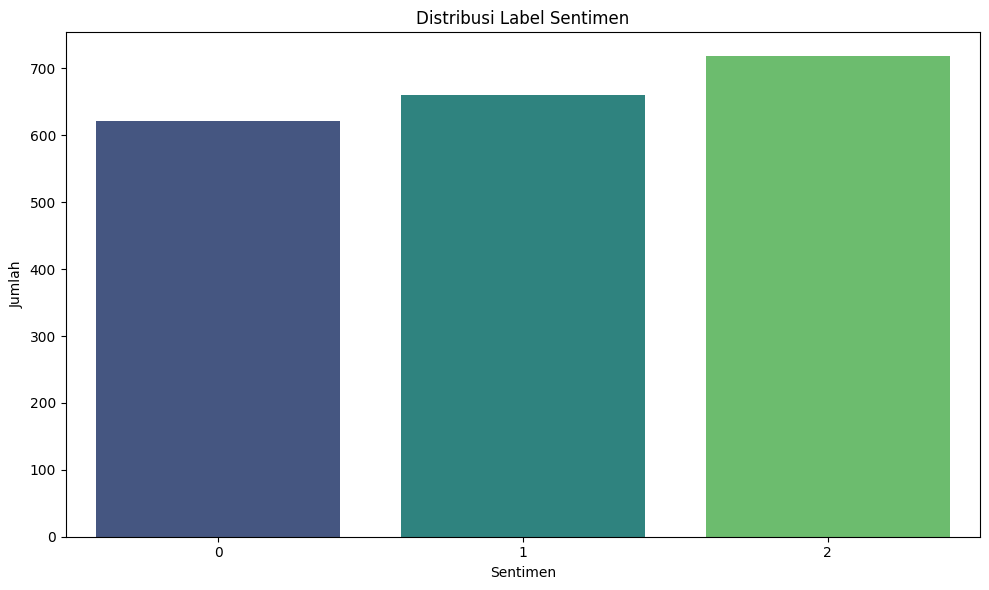

In [ ]:
# Visualisasi persebaran sentimen
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=desa_wisata_df, palette='viridis')
plt.title('Distribusi Label Sentimen')
plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

In [ ]:
# Simpan dataframe yang telah diproses
desa_wisata_df.to_excel('desa_wisata_df_processed.xlsx', index=False)

In [7]:
# Membuat salinan untuk model nanti
desa_wisata_model = desa_wisata_df.copy()
# desa_wisata_model.to_excel('desa_wisata_model.xlsx', index=False)

# print("\nData telah diproses dan disimpan dalam file 'desa_wisata_df_processed.xlsx' dan 'desa_wisata_lstm.xlsx'")

# Split Data

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler

In [8]:
from sklearn.model_selection import train_test_split

# Melihat distribusi kelas
print("Distribusi sentimen sebelum split:")
print(desa_wisata_model['label'].value_counts())

# Ambil fitur dan label
X = desa_wisata_model['cleaned_review']
y = desa_wisata_model['label'].astype(int)

# Split pertama: 70% training, 30% sisanya untuk val & test
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split kedua: 15% validation, 15% testing dari 30% data awal
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

# Ringkasan
print("\nJumlah data:")
print(f"Total: {len(X)}")
print(f"Training: {len(X_train)} ({len(X_train)/len(X)*100:.1f}%)")
print(f"Validation: {len(X_val)} ({len(X_val)/len(X)*100:.1f}%)")
print(f"Testing: {len(X_test)} ({len(X_test)/len(X)*100:.1f}%)")

print("\nDistribusi kelas pada data training:")
print(y_train.value_counts())
print("\nDistribusi kelas pada data validation:")
print(y_val.value_counts())
print("\nDistribusi kelas pada data testing:")
print(y_test.value_counts())

Distribusi sentimen sebelum split:
label
2    718
1    660
0    622
Name: count, dtype: int64

Jumlah data:
Total: 2000
Training: 1400 (70.0%)
Validation: 300 (15.0%)
Testing: 300 (15.0%)

Distribusi kelas pada data training:
label
2    503
1    462
0    435
Name: count, dtype: int64

Distribusi kelas pada data validation:
label
2    108
1     99
0     93
Name: count, dtype: int64

Distribusi kelas pada data testing:
label
2    107
1     99
0     94
Name: count, dtype: int64


In [ ]:
# Simpan hasil split untuk penggunaan berikutnya
split_data = {
    'X_train': X_train,
    'X_val': X_val,
    'X_test': X_test,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test
}

# Simpan dalam format yang mudah dimuat
import pickle
with open('split_data_balance_model.pkl', 'wb') as f:
    pickle.dump(split_data, f)

print("\nData split telah disimpan dalam 'split_data_balance_model.pkl'")


Data split telah disimpan dalam 'split_data_balance_model.pkl'


# Tokenizing using IndoBERT

In [2]:
import pickle
import numpy as np
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel, BertTokenizer, BertModel
from tqdm import tqdm

2025-06-14 21:46:33.060714: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1749912393.080742  195491 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1749912393.086827  195491 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1749912393.103214  195491 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749912393.103231  195491 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1749912393.103233  195491 computation_placer.cc:177] computation placer alr

In [7]:
# Load split data
with open('IndoBERT/Balance/split_data_balance_model.pkl', 'rb') as f:
    split_data = pickle.load(f)

X_train = split_data['X_train']
X_val = split_data['X_val']
X_test = split_data['X_test']
y_train = split_data['y_train']
y_val = split_data['y_val']
y_test = split_data['y_test']

In [5]:
print("Memulai tokenisasi dan embedding dengan IndoBERT...")

# Pilih model IndoBERT
model_name = "indobenchmark/indobert-large-p2"

# Load tokenizer IndoBERT
tokenizer = AutoTokenizer.from_pretrained(model_name)

Memulai tokenisasi dan embedding dengan IndoBERT...


In [13]:
# Fungsi untuk tokenisasi dengan IndoBERT
def tokenize_text(texts, max_length=128):
    """
    Tokenisasi teks menggunakan IndoBERT tokenizer
    """
    input_ids = []
    attention_masks = []

    for text in tqdm(texts, desc="Tokenizing texts"):
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_length,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='np'
        )

        input_ids.append(encoded['input_ids'][0])
        attention_masks.append(encoded['attention_mask'][0])

    return np.array(input_ids), np.array(attention_masks)

In [14]:
# Tokenisasi data
print("Tokenisasi data training...")
X_train_ids, X_train_masks = tokenize_text(X_train)

print("Tokenisasi data validation...")
X_val_ids, X_val_masks = tokenize_text(X_val)

print("Tokenisasi data testing...")
X_test_ids, X_test_masks = tokenize_text(X_test)

print(f"Bentuk input_ids training: {X_train_ids.shape}")
print(f"Bentuk attention_masks training: {X_train_masks.shape}")

Tokenisasi data training...


Tokenizing texts: 100%|██████████| 1400/1400 [00:00<00:00, 6635.33it/s]


Tokenisasi data validation...


Tokenizing texts: 100%|██████████| 300/300 [00:00<00:00, 6825.11it/s]


Tokenisasi data testing...


Tokenizing texts: 100%|██████████| 300/300 [00:00<00:00, 6852.09it/s]

Bentuk input_ids training: (1400, 128)
Bentuk attention_masks training: (1400, 128)


In [15]:
indobert_data = {
    'X_train_ids': X_train_ids,
    'X_train_masks': X_train_masks,
    'X_val_ids': X_val_ids,
    'X_val_masks': X_val_masks,
    'X_test_ids': X_test_ids,
    'X_test_masks': X_test_masks,
    'y_train': y_train,
    'y_val': y_val,
    'y_test': y_test,
    'vocab_size': tokenizer.vocab_size
}

## Load

In [3]:
# Load IndoBERT tokenizer
with open('IndoBERT/Balance/indobert_tokenizer_data_balance.pkl', 'rb') as f:
    tokenizer_data = pickle.load(f)

tokenizer = tokenizer_data['tokenizer']

In [4]:
# Load data yang sudah di-tokenisasi dengan IndoBERT
with open('IndoBERT/Balance/indobert_data_balance.pkl', 'rb') as f:
    indobert_data = pickle.load(f)

X_train_ids = indobert_data['X_train_ids']
X_train_masks = indobert_data['X_train_masks']
X_val_ids = indobert_data['X_val_ids']
X_val_masks = indobert_data['X_val_masks']
X_test_ids = indobert_data['X_test_ids']
X_test_masks = indobert_data['X_test_masks']

y_train = indobert_data['y_train']
y_val = indobert_data['y_val']
y_test = indobert_data['y_test']
vocab_size = indobert_data['vocab_size']

# Embedding using IndoBERT

In [6]:
print("Mengekstrak embeddings menggunakan IndoBERT...")
bert_model = AutoModel.from_pretrained(model_name)

def get_bert_embeddings(input_ids, attention_masks, batch_size=16):
    """
    Mengambil *all-token* embeddings IndoBERT untuk seluruh data secara efisien.
    """
    bert_model.eval()
    all_embeddings = []

    for i in tqdm(range(0, len(input_ids), batch_size), desc="Generating embeddings"):
        batch_input_ids   = torch.tensor(input_ids[i:i+batch_size], dtype=torch.long)
        batch_attention_masks = torch.tensor(attention_masks[i:i+batch_size], dtype=torch.long)

        with torch.no_grad():
            outputs = bert_model(
                input_ids=batch_input_ids,
                attention_mask=batch_attention_masks
            )

        # Ambil semua token embeddings: shape (batch, seq_len, embed_dim)
        token_embeddings = outputs.last_hidden_state.cpu().numpy()
        all_embeddings.append(token_embeddings)

    # Gabungkan semua batch jadi satu array: (n_samples, seq_len, embed_dim)
    return np.concatenate(all_embeddings, axis=0)

try:
    # Contoh dulu
    sample_size = min(100, len(X_train_ids))
    X_train_embeddings_sample = get_bert_embeddings(
        X_train_ids[:sample_size],
        X_train_masks[:sample_size]
    )
    print(f"Bentuk contoh embeddings (100 sampel): {X_train_embeddings_sample.shape}")

except Exception as e:
    print(f"Error saat ekstrak embeddings: {e}")
    print("Melanjutkan dengan tokenisasi saja tanpa ekstraksi embeddings")

# Full dataset
X_train_embed = get_bert_embeddings(X_train_ids, X_train_masks)
X_val_embed = get_bert_embeddings(X_val_ids, X_val_masks)
X_test_embed = get_bert_embeddings(X_test_ids, X_test_masks)

Mengekstrak embeddings menggunakan IndoBERT...


Generating embeddings: 100%|██████████| 7/7 [00:12<00:00,  1.85s/it]


Bentuk contoh embeddings (100 sampel): (100, 128, 1024)


Generating embeddings: 100%|██████████| 19/19 [00:37<00:00,  1.97s/it]


In [7]:
# Hasil embedding
with open('indobert_large_embeddings_all_token_data_balance.pkl', 'wb') as f:
    pickle.dump({
        'X_train_embed': X_train_embed,
        'X_val_embed': X_val_embed,
        'X_test_embed': X_test_embed,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test
    }, f)

In [17]:
# Simpan hasil

# Hasil output tokenisasi
with open('indobert_base_data_balance.pkl', 'wb') as f:
    pickle.dump(indobert_data, f)

# Tokenizer kalau mau tokenisasi ulang (misal untuk data baru)
with open('indobert_base_tokenizer_data_balance.pkl', 'wb') as f:
    pickle.dump({'tokenizer': tokenizer, 'model_name': model_name}, f)

# Hasil embedding
with open('indobert_base_embeddings_cls_data_balance.pkl', 'wb') as f:
    pickle.dump({
        'X_train_embed': X_train_embed,
        'X_val_embed': X_val_embed,
        'X_test_embed': X_test_embed,
        'y_train': y_train,
        'y_val': y_val,
        'y_test': y_test
    }, f)

print("Semua embedding dan tokenisasi berhasil disimpan.")

Semua embedding dan tokenisasi berhasil disimpan.


## Cek IndoBERT

In [20]:
import pickle
import numpy as np

# Load tokenizer dan data tokenisasi
with open('IndoBERT/Balance/indobert_base/indobert_base_tokenizer_data_balance.pkl', 'rb') as f:
    tokenizer_data = pickle.load(f)

with open('IndoBERT/Balance/indobert_base/indobert_base_data_balance.pkl', 'rb') as f:
    indobert_data = pickle.load(f)

tokenizer = tokenizer_data['tokenizer']
vocab_size = tokenizer.vocab_size
X_train_ids = indobert_data['X_train_ids']

# Cari indeks tertinggi di data token
max_index_in_data = np.max(X_train_ids)

print(f"Vocab size dari tokenizer IndoBERT: {vocab_size}")
print(f"Indeks token tertinggi di X_train_ids: {max_index_in_data}")

if max_index_in_data >= vocab_size:
    print("⚠️ WARNING: Ada token ID di data yang lebih besar dari vocab size. Model Embedding bisa error.")
else:
    print("✅ Aman: Semua ID token masih dalam rentang vocab size.")

Vocab size dari tokenizer IndoBERT: 30521
Indeks token tertinggi di X_train_ids: 30483
✅ Aman: Semua ID token masih dalam rentang vocab size.


In [ ]:
# Cek isi tokenizer

# Muat tokenizer
with open('IndoBERT/Balance/indobert_base/indobert_base_tokenizer_data_balance.pkl','rb') as f:
    data = pickle.load(f)

tokenizer  = data['tokenizer']
model_name = data['model_name']

print("Model:", model_name)
print("Type:", type(tokenizer))
print("Vocab size:", tokenizer.vocab_size)
print("Max length:", tokenizer.model_max_length)
print("Special tokens:", tokenizer.all_special_tokens)
print("Contoh beberapa token → ID:")
for tok in tokenizer.all_special_tokens[:5]:
    print(f"  {tok}  →  {tokenizer.convert_tokens_to_ids(tok)}")
print("\nContoh entry di vocab:")
for tok, idx in list(tokenizer.get_vocab().items())[:10]:
    print(f"  {tok:<10} → {idx}")


Model: indobenchmark/indobert-base-p2
Type: <class 'transformers.models.bert.tokenization_bert_fast.BertTokenizerFast'>
Vocab size: 30521
Max length: 1000000000000000019884624838656
Special tokens: ['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']
Contoh beberapa token → ID:
  [UNK]  →  1
  [SEP]  →  3
  [PAD]  →  0
  [CLS]  →  2
  [MASK]  →  4

Contoh entry di vocab:
  editing    → 18725
  mutlak     → 7608
  bub        → 4979
  id         → 1519
  iqbal      → 18367
  batub      → 7948
  karbu      → 29530
  ##wai      → 14695
  neder      → 30111
  saman      → 26250
